# Import Modules

In [2]:
# %matplotlib notebook
import os
import sys
import h5py
import tables
import cv2
import numpy as np
import matplotlib.pyplot as plt

import psana as ps
import ana_fun_xpplw6419_v1_0 as ana # change version if necessary

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from pathlib import Path

#plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,5)
plt.rc('font', size=12)
length = 8
width = 1
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width
plt.rcParams['lines.markersize'] = 3

print('-----------------')
print('Modules imported!')
print('-----------------')

-----------------
Modules imported!
-----------------


# Select Runs and Check if Processed
Also prepare output folder for saving data

In [30]:

data_path = '/cds/data/psdm/xpp/xpplw6419/scratch/SLR/1D_loff_bin/'
exp = 'xpplw6419'

runs = [195,196,197,198,199,200,201,202,203]


for run in runs:
    complete = False
    for fname in os.listdir(data_path):
        if str(run) in fname:
            complete = True
    if complete:        
        print("Run {} has been processed".format(run))
    else:
        print("Run {} has NOT been processed".format(run))

        
        
avg_output_path = '/cds/data/psdm/xpp/xpplw6419/scratch/SLR/avgs' # path to save averaged data

figname_scan_numbers = 'Runs'
for label in runs:
        figname_scan_numbers += '_'+str(label)

if not os.path.isdir(avg_output_path):
    os.makedirs(avg_output_path)


Run 195 has been processed
Run 196 has been processed
Run 197 has been processed
Run 198 has been processed
Run 199 has been processed
Run 200 has been processed
Run 201 has been processed
Run 202 has been processed
Run 203 has been processed


# Get norm_diff_bin

In [3]:
data_path = '/cds/data/psdm/xpp/xpplw6419/scratch/SLR/norm_diff_bin/'
exp = 'xpplw6419'

runs = [195,196,197,198,199,200,201,202,203]

for run in runs:
    complete = False
    for fname in os.listdir(data_path):
        if str(run) in fname:
            complete = True
    if complete:        
        print("Run {} has been processed".format(run))
    else:
        print("Run {} has NOT been processed".format(run))

avg_output_path = '/cds/data/psdm/xpp/xpplw6419/scratch/SLR/avgs/norm_diff_bin/' # path to save averaged data

figname_scan_numbers = 'Runs'
for label in runs:
        figname_scan_numbers += '_'+str(label)

if not os.path.isdir(avg_output_path):
    os.makedirs(avg_output_path)

Run 195 has been processed
Run 196 has been processed
Run 197 has been processed
Run 198 has been processed
Run 199 has been processed
Run 200 has been processed
Run 201 has been processed
Run 202 has been processed
Run 203 has been processed


In [4]:
name = '{}_run_{:3d}.h5'.format(exp,runs[0]) # format of output hdf5 filename
fname = data_path+'/'+name

# Get the number of bins for time delay and energy
with h5py.File(fname, 'r') as hf:
    j = np.shape(hf['Pump-prob_data/ppQ/intensity_mean'])[0]
    k = np.shape(hf['Pump-prob_data/ppQ/intensity_mean'])[1]

i = len(runs)

# Make 3-d arrays to get normalized and pump-probe data
# intensity_lon_normQ_all = np.zeros((i,j,k))
# intensity_loff_normQ_all = np.zeros((i,j,k))
ppQ_all = np.zeros((i,j,k))
# intensity_lon_normI0_all = np.zeros((i,j,k))
# intensity_loff_normI0_all = np.zeros((i,j,k))
ppI0_all = np.zeros((i,j,k))
# For energy and delay
energy = []
delay = []

# Get data
for ii, run in enumerate(runs):
    name = '{}_run_{:3d}.h5'.format(exp,run) 
    fname = data_path+'/'+name
    with h5py.File(fname, 'r') as hf:
        if ii == 0:
            energy[:] = hf['Pump-prob_data/ppI0/energy_bin']
            delay[:] = hf['Pump-prob_data/ppI0/delay_bin']
        ppQ_all[ii] = hf['Pump-prob_data/ppQ/intensity_mean']
        ppI0_all[ii] = hf['Pump-prob_data/ppI0/intensity_mean']

# Calculate averages and standard deviations

ppQ_avg = np.nanmean(ppQ_all, axis=0)
ppQ_std = np.nanstd(ppQ_all, axis=0)

ppI0_avg = np.nanmean(ppI0_all, axis=0)
ppI0_std = np.nanstd(ppI0_all, axis=0)

energy = np.array(energy)
delay = np.array(delay)

print('----------------------------------------------------------------')
print('Data obtained and averages (and standard deviations) calculated!')
print('----------------------------------------------------------------')

----------------------------------------------------------------
Data obtained and averages (and standard deviations) calculated!
----------------------------------------------------------------


# Get Data

In [3]:
name = '{}_run_{:3d}.h5'.format(exp,runs[0]) # format of output hdf5 filename
fname = data_path+'/'+name

# Get the number of bins for time delay and energy
with h5py.File(fname, 'r') as hf:
    j = np.shape(hf['Pump-probe_data/ppQ'])[0]
    k = np.shape(hf['Pump-probe_data/ppQ'])[1]

i = len(runs)

# Make 3-d arrays to get normalized and pump-probe data
intensity_lon_normQ_all = np.zeros((i,j,k))
intensity_loff_normQ_all = np.zeros((i,j,k))
ppQ_all = np.zeros((i,j,k))
intensity_lon_normI0_all = np.zeros((i,j,k))
intensity_loff_normI0_all = np.zeros((i,j,k))
ppI0_all = np.zeros((i,j,k))
# For energy and delay
energy = []
delay = []

# Get data
for ii, run in enumerate(runs):
    name = '{}_run_{:3d}.h5'.format(exp,run) 
    fname = data_path+'/'+name
    with h5py.File(fname, 'r') as hf:
        if ii == 0:
            energy[:] = hf['Laser_on_binned/energy_bin']
            delay[:] = hf['Laser_on_binned/delay_bin']
        intensity_lon_normQ_all[ii] = hf['Normalized_data/intensity_lon_normQ']
        intensity_loff_normQ_all[ii] = hf['Normalized_data/intensity_loff_normQ']
        ppQ_all[ii] = hf['Pump-probe_data/ppQ']
        intensity_lon_normI0_all[ii] = hf['Normalized_data/intensity_lon_normI0']
        intensity_loff_normI0_all[ii] = hf['Normalized_data/intensity_loff_normI0']
        ppI0_all[ii] = hf['Pump-probe_data/ppI0']

# Calculate averages and standard deviations
intensity_lon_normQ_avg = np.nanmean(intensity_lon_normQ_all, axis=0)
intensity_lon_normQ_std = np.nanstd(intensity_lon_normQ_all, axis=0)
intensity_loff_normQ_avg = np.nanmean(intensity_loff_normQ_all, axis=0)
intensity_loff_normQ_std = np.nanstd(intensity_loff_normQ_all, axis=0)
ppQ_avg = np.nanmean(ppQ_all, axis=0)
ppQ_std = np.nanstd(ppQ_all, axis=0)
intensity_lon_normI0_avg = np.nanmean(intensity_lon_normI0_all, axis=0)
intensity_lon_normI0_std = np.nanstd(intensity_lon_normI0_all, axis=0)
intensity_loff_normI0_avg = np.nanmean(intensity_loff_normI0_all, axis=0)
intensity_loff_normI0_std = np.nanstd(intensity_loff_normI0_all, axis=0)
ppI0_avg = np.nanmean(ppI0_all, axis=0)
ppI0_std = np.nanstd(ppI0_all, axis=0)

energy = np.array(energy)
delay = np.array(delay)

print('----------------------------------------------------------------')
print('Data obtained and averages (and standard deviations) calculated!')
print('----------------------------------------------------------------')

----------------------------------------------------------------
Data obtained and averages (and standard deviations) calculated!
----------------------------------------------------------------


# Two-Dimensional Plots of Averaged Pump-Probe Data

Text(0.5, 1.0, 'I0 Normalized')

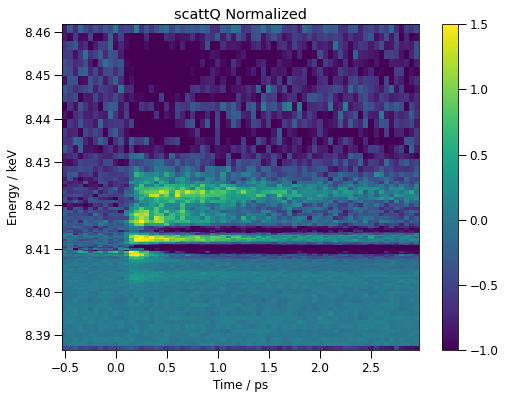

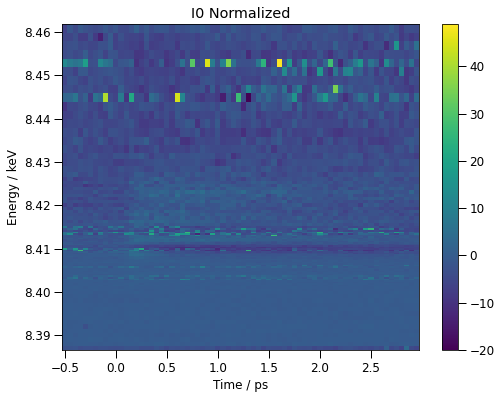

In [16]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto',vmax=1.5,vmin=-1)
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

# Single Bin Scans

## Plot 1D Energy Scans (Individual Bins)

In [6]:
target_delay_time = 0.5
target_tbin = (np.argmin(np.abs(delay-target_delay_time)))
print('''
----------------------
Target Delay Time = {} ps
Actual Delay Time = {:.2f} ps
----------------------
'''.format(target_delay_time,delay[target_tbin]))


----------------------
Target Delay Time = 0.5 ps
Actual Delay Time = 0.50 ps
----------------------



### Visualise Target Delay Time on 2D Plots

Text(0.5, 1.0, 'I0 Normalized')

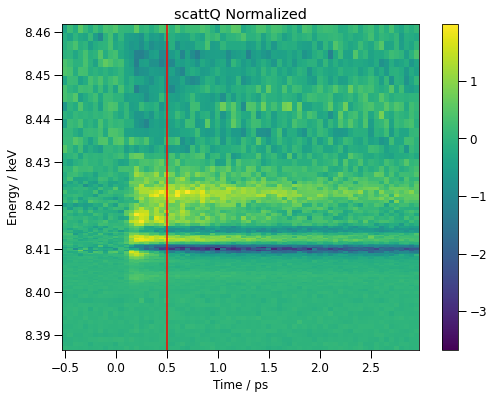

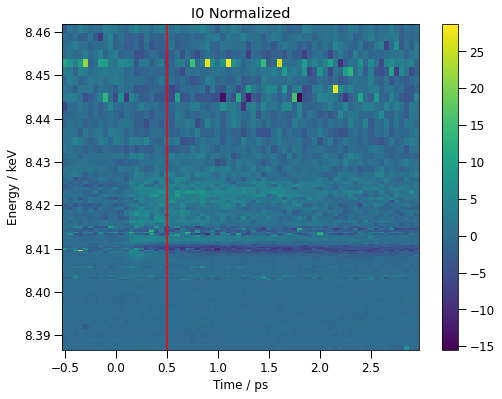

In [7]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
plt.axvline(x=delay[target_tbin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
plt.axvline(x=delay[target_tbin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Plot Stacked 1D Energy Traces at Specified Delay Time

Text(0.5, 1.0, 'Pump-Probe')

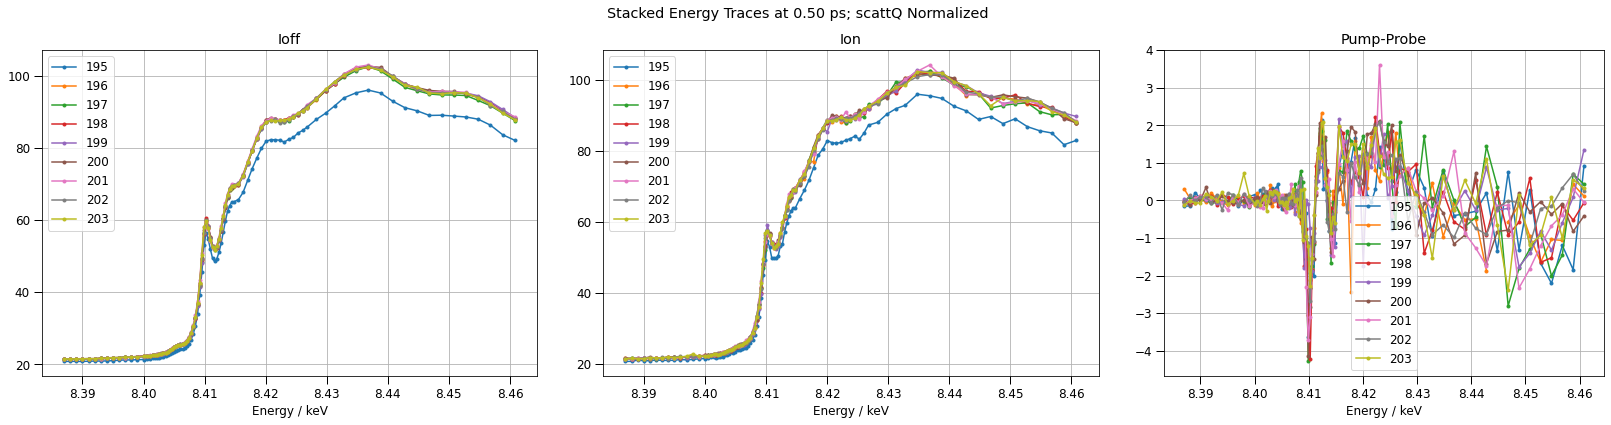

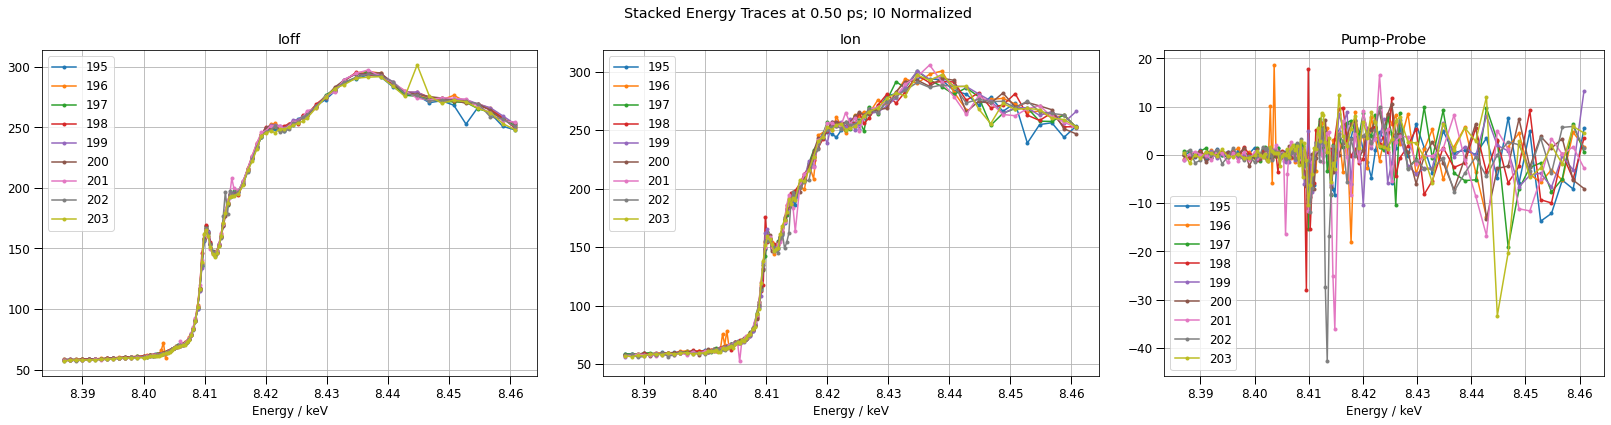

In [8]:
nrows = 6
ncols = 28

# ScattQ Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Stacked Energy Traces at {:.2f} ps; scattQ Normalized'.format(delay[target_tbin]))
plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(energy,intensity_loff_normQ_all[i,target_tbin,:],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')
plt.title('Ioff')

plt.subplot2grid((nrows,ncols),(0,int((ncols/3)+1)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(energy,intensity_lon_normQ_all[i,target_tbin,:],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')
plt.title('Ion')


plt.subplot2grid((nrows,ncols),(0,int((2*ncols/3)+2)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(energy,ppQ_all[i,target_tbin,:],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')
plt.title('Pump-Probe')


# I0 Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Stacked Energy Traces at {:.2f} ps; I0 Normalized'.format(delay[target_tbin]))
plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(energy,intensity_loff_normI0_all[i,target_tbin,:],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')
plt.title('Ioff')

plt.subplot2grid((nrows,ncols),(0,int((ncols/3)+1)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(energy,intensity_lon_normI0_all[i,target_tbin,:],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')
plt.title('Ion')

plt.subplot2grid((nrows,ncols),(0,int((2*ncols/3)+2)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(energy,ppI0_all[i,target_tbin,:],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')
plt.title('Pump-Probe')

### Plot Averaged 1D Energy Traces at Specified Delay Time

In [ ]:
nrows = 6
ncols = 19

# ScattQ Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Energy Traces at {:.2f} ps; scattQ Normalized'.format(delay[target_tbin]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,intensity_loff_normQ_avg[target_tbin,:],'o-',color='blue',label='Ioff')
plt.fill_between(energy,(intensity_loff_normQ_avg-intensity_loff_normQ_std)[target_tbin,:],
                 (intensity_loff_normQ_avg+intensity_loff_normQ_std)[target_tbin,:],
                 color='blue', alpha=0.2)
plt.plot(energy,intensity_lon_normQ_avg[target_tbin,:],'o-',color='red',label='Ion')
plt.fill_between(energy,(intensity_lon_normQ_avg-intensity_lon_normQ_std)[target_tbin,:],
                 (intensity_lon_normQ_avg+intensity_lon_normQ_std)[target_tbin,:],
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,ppQ_avg[target_tbin,:],'o-',color='green',label='pump-probe')
plt.fill_between(energy,(ppQ_avg-ppQ_std)[target_tbin,:],
                 (ppQ_avg+ppQ_std)[target_tbin,:],
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')


# I0 Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Energy Traces at {:.2f} ps; I0 Normalized'.format(delay[target_tbin]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,intensity_loff_normI0_avg[target_tbin,:],'o-',color='blue',label='Ioff')
plt.fill_between(energy,(intensity_loff_normI0_avg-intensity_loff_normQ_std)[target_tbin,:],
                 (intensity_loff_normI0_avg+intensity_loff_normI0_std)[target_tbin,:],
                 color='blue', alpha=0.2)
plt.plot(energy,intensity_lon_normI0_avg[target_tbin,:],'o-',color='red',label='Ion')
plt.fill_between(energy,(intensity_lon_normI0_avg-intensity_lon_normI0_std)[target_tbin,:],
                 (intensity_lon_normI0_avg+intensity_lon_normI0_std)[target_tbin,:],
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,ppI0_avg[target_tbin,:],'o-',color='green',label='pump-probe')
plt.fill_between(energy,(ppI0_avg-ppI0_std)[target_tbin,:],
                 (ppI0_avg+ppI0_std)[target_tbin,:],
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

## Plot 1D Time Scans (Individual Bins)

In [9]:
target_energy = 8.411
target_ebin = (np.argmin(np.abs(energy-target_energy)))
print('''
----------------------
Target Delay Time = {} keV
Actual Delay Time = {:.4f} keV
----------------------
'''.format(target_energy,energy[target_ebin]))


----------------------
Target Delay Time = 8.411 keV
Actual Delay Time = 8.4109 keV
----------------------



### Visualise Target Energy on 2D Plots

Text(0.5, 1.0, 'I0 Normalized')

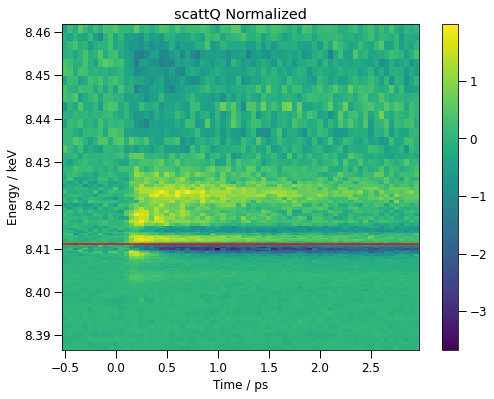

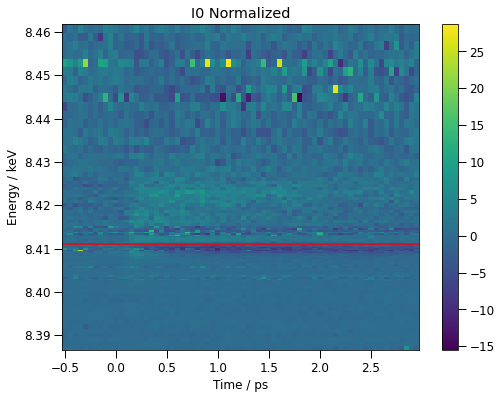

In [10]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
plt.axhline(y=energy[target_ebin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
plt.axhline(y=energy[target_ebin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Plot Stacked 1D Time Traces at Specified Energy

Text(0.5, 1.0, 'Pump-Probe')

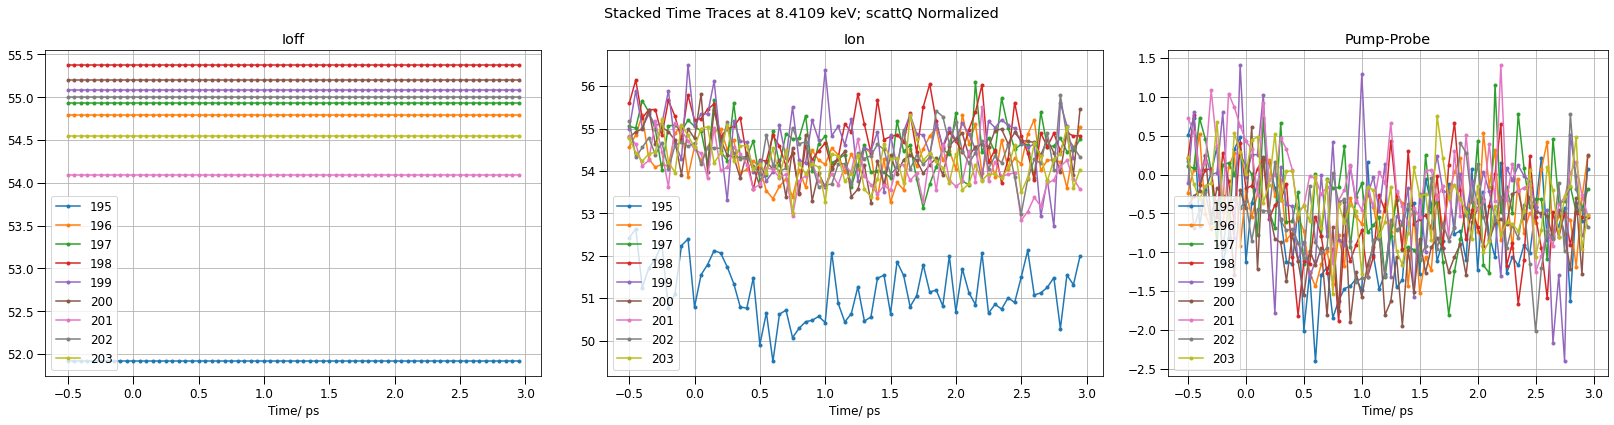

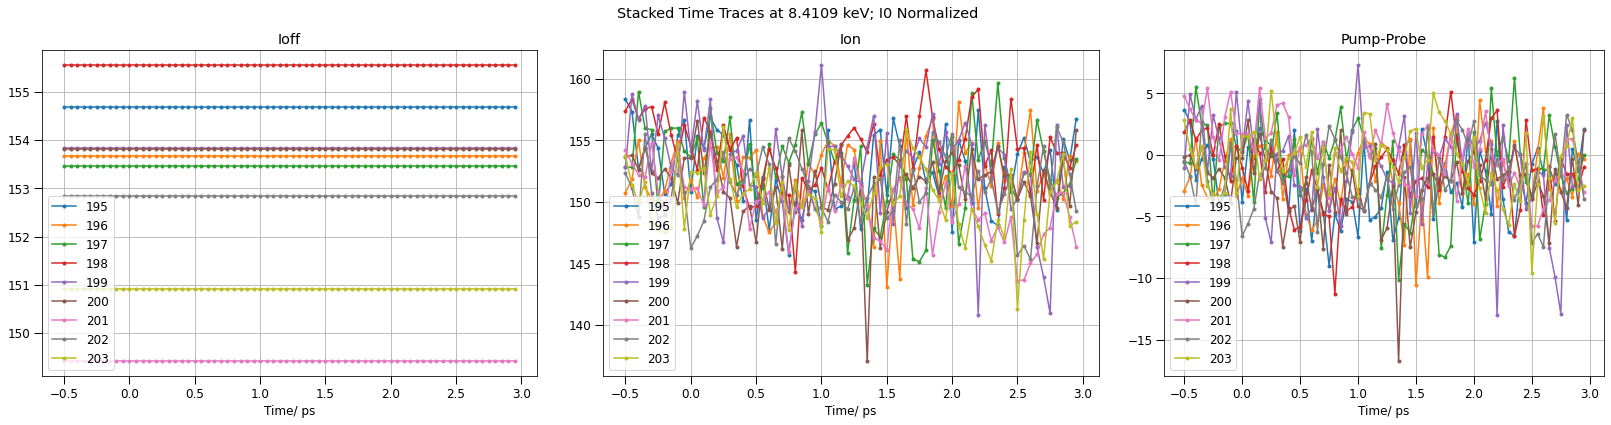

In [11]:
nrows = 6
ncols = 28

# ScattQ Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Stacked Time Traces at {:.4f} keV; scattQ Normalized'.format(energy[target_ebin]))
plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(delay,intensity_loff_normQ_all[i,:,target_ebin],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Time/ ps')
plt.title('Ioff')

plt.subplot2grid((nrows,ncols),(0,int((ncols/3)+1)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(delay,intensity_lon_normQ_all[i,:,target_ebin],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Time/ ps')
plt.title('Ion')


plt.subplot2grid((nrows,ncols),(0,int((2*ncols/3)+2)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(delay,ppQ_all[i,:,target_ebin],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Time/ ps')
plt.title('Pump-Probe')


# I0 Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Stacked Time Traces at {:.4f} keV; I0 Normalized'.format(energy[target_ebin]))
plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(delay,intensity_loff_normI0_all[i,:,target_ebin],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Time/ ps')
plt.title('Ioff')

plt.subplot2grid((nrows,ncols),(0,int((ncols/3)+1)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(delay,intensity_lon_normI0_all[i,:,target_ebin],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Time/ ps')
plt.title('Ion')

plt.subplot2grid((nrows,ncols),(0,int((2*ncols/3)+2)),rowspan=nrows,colspan=int(ncols/3))
for i,run in enumerate(runs):
    plt.plot(delay,ppI0_all[i,:,target_ebin],'o-',label=str(run))
plt.legend()
plt.grid()
plt.xlabel('Time/ ps')
plt.title('Pump-Probe')

### Plot Averaged 1D Time Traces at Specified Delay Time

In [ ]:
nrows = 6
ncols = 19

# ScattQ Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Time Traces at {:.4f} keV; scattQ Normalized'.format(energy[target_ebin]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,intensity_loff_normQ_avg[:,target_ebin],'o-',color='blue',label='Ioff')
plt.fill_between(delay,(intensity_loff_normQ_avg-intensity_loff_normQ_std)[:,target_ebin],
                 (intensity_loff_normQ_avg+intensity_loff_normQ_std)[:,target_ebin],
                 color='blue', alpha=0.2)
plt.plot(delay,intensity_lon_normQ_avg[:,target_ebin],'o-',color='red',label='Ion')
plt.fill_between(delay,(intensity_lon_normQ_avg-intensity_lon_normQ_std)[:,target_ebin],
                 (intensity_lon_normQ_avg+intensity_lon_normQ_std)[:,target_ebin],
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,ppQ_avg[:,target_ebin],'o-',color='green',label='pump-probe')
plt.fill_between(delay,(ppQ_avg-ppQ_std)[:,target_ebin],
                 (ppQ_avg+ppQ_std)[:,target_ebin],
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')


# I0 Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Time Traces at {:.4f} keV; I0 Normalized'.format(energy[target_ebin]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,intensity_loff_normI0_avg[:,target_ebin],'o-',color='blue',label='Ioff')
plt.fill_between(delay,(intensity_loff_normI0_avg-intensity_loff_normQ_std)[:,target_ebin],
                 (intensity_loff_normI0_avg+intensity_loff_normI0_std)[:,target_ebin],
                 color='blue', alpha=0.2)
plt.plot(delay,intensity_lon_normI0_avg[:,target_ebin],'o-',color='red',label='Ion')
plt.fill_between(delay,(intensity_lon_normI0_avg-intensity_lon_normI0_std)[:,target_ebin],
                 (intensity_lon_normI0_avg+intensity_lon_normI0_std)[:,target_ebin],
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,ppI0_avg[:,target_ebin],'o-',color='green',label='pump-probe')
plt.fill_between(delay,(ppI0_avg-ppI0_std)[:,target_ebin],
                 (ppI0_avg+ppI0_std)[:,target_ebin],
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

# Compare Single Bins

## Compare Single Bin Energy Traces at Different Delay Times

In [ ]:
target_delay_times = [0,0.1,0.3,1,2.5]
target_tbins = []
for i,target_delay_time in enumerate(target_delay_times):
    target_tbin = (np.argmin(np.abs(delay-target_delay_time)))
    target_tbins.append(target_tbin)
    print('''
    ----------------------
    Target Delay Time = {} ps
    Actual Delay Time = {:.2f} ps
    ----------------------
    '''.format(target_delay_time,delay[target_tbin]))

### Visualise Target Delay Times on 2D Plots

In [ ]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
for target_tbin in target_tbins:
    plt.axvline(x=delay[target_tbin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
for target_tbin in target_tbins:
    plt.axvline(x=delay[target_tbin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Plot Stacked 1D Energy Traces at Specified Delay Times (Single Bins)

In [ ]:
norm_method = 'Q'     # 'Q' or 'I0'
e_min = 8.39
e_max = 8.46


if norm_method == 'Q':
    nrows = 10
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Energy Traces at Specified Time Delays, scattQ Normalized')
    
    plt.subplot2grid((nrows,ncols),(0,0),rowspan=int(nrows/2),colspan=ncols)
    plt.plot(energy,np.nanmean(intensity_loff_normQ_avg[target_tbins,:],axis=0),'-o',color='black',label='Ioff')
    plt.xticks([])
    plt.xlim(e_min,e_max)
    plt.legend()
    
    plt.subplot2grid((nrows,ncols),(int(nrows/2),0),rowspan=int(nrows/2),colspan=ncols)
    for target_tbin in target_tbins:
        plt.plot(energy,ppQ_avg[target_tbin,:],'-o',label='{:.2f} ps'.format(delay[target_tbin]))
    plt.legend()
    plt.xlim(e_min,e_max)

if norm_method == 'I0':
    nrows = 10
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Energy Traces at Specified Time Delays, I0 Normalized')
    
    plt.subplot2grid((nrows,ncols),(0,0),rowspan=int(nrows/2),colspan=ncols)
    plt.plot(energy,np.nanmean(intensity_loff_normI0_avg[target_tbins,:],axis=0),'-o',color='black',label='Ioff')
    plt.xticks([])
    plt.xlim(e_min,e_max)
    plt.legend()
    
    plt.subplot2grid((nrows,ncols),(int(nrows/2),0),rowspan=int(nrows/2),colspan=ncols)
    for target_tbin in target_tbins:
        plt.plot(energy,ppI0_avg[target_tbin,:],'-o',label='{:.2f} ps'.format(delay[target_tbin]))
    plt.legend()
    plt.xlim(e_min,e_max)

## Compare Single Bin Time Traces at Different Energies

In [ ]:
target_energies = [8.409,8.411,8.417]
target_ebins = []
for i,target_energy in enumerate(target_energies):
    target_ebin = (np.argmin(np.abs(energy-target_energy)))
    target_ebins.append(target_ebin)
    print('''
    ----------------------
    Target Energy = {} keV
    Actual Energy = {:.4f} keV
    ----------------------
    '''.format(target_energy,energy[target_ebin]))

### Visualise Target Energies on 2D Plots

In [ ]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
for target_ebin in target_ebins:
    plt.axhline(y=energy[target_ebin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
for target_ebin in target_ebins:
    plt.axhline(y=energy[target_ebin],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Plot Stacked 1D Time Traces at Specified Energies (Single Bins)

In [ ]:
norm_method = 'Q'     # 'Q' or 'I0'
t_min = -0.5
t_max = 3


if norm_method == 'Q':
    nrows = 5
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Time Traces at Specified Energies, scattQ Normalized')
    
    for target_ebin in target_ebins:
        plt.plot(delay,ppQ_avg[:,target_ebin],'-o',label='{:.4f} keV'.format(energy[target_ebin]))
        plt.fill_between(delay,(ppQ_avg-ppQ_std)[:,target_ebin],
                        (ppQ_avg+ppQ_std)[:,target_ebin],alpha=0.2)
    plt.legend()
    plt.xlim(t_min,t_max)

elif norm_method == 'I0':
    nrows = 5
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Time Traces at Specified Energies, scattQ Normalized')
    
    for target_ebin in target_ebins:
        plt.plot(delay,ppI0_avg[:,target_ebin],'-o',label='{:.4f} keV'.format(energy[target_ebin]))
        plt.fill_between(delay,(ppI0_avg-ppI0_std)[:,target_ebin],
                        (ppI0_avg+ppI0_std)[:,target_ebin],alpha=0.2)
    plt.legend()
    plt.xlim(t_min,t_max)

# Integrated Bins

## Plot 1D Energy Scans (Integrated over Multiple Bins)

In [53]:
target_delay_time_min = -0.5
target_delay_time_max = 3

target_tbin_min = (np.argmin(np.abs(delay-target_delay_time_min)))
target_tbin_max = (np.argmin(np.abs(delay-target_delay_time_max)))
print('''
----------------------
Target Delay Time (Min) = {} ps
Target Delay Time (Max) = {} ps
----------------------
Actual Delay Time (Min) = {:.2f} ps
Actual Delay Time (Max) = {:.2f} ps
----------------------
'''.format(target_delay_time_min,target_delay_time_max,delay[target_tbin_min],delay[target_tbin_max]))


----------------------
Target Delay Time (Min) = -0.5 ps
Target Delay Time (Max) = 3 ps
----------------------
Actual Delay Time (Min) = -0.50 ps
Actual Delay Time (Max) = 2.95 ps
----------------------



### Visualise Target Delay Time Regions on 2D Plots

In [ ]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
plt.axvline(x=delay[target_tbin_min],color='red')
plt.axvline(x=delay[target_tbin_max],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
plt.axvline(x=delay[target_tbin_min],color='red')
plt.axvline(x=delay[target_tbin_max],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Integrate Data over Specified Time Region

In [54]:
intensity_loff_normQ_Eavg = np.nanmean(intensity_loff_normQ_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
intensity_lon_normQ_Eavg = np.nanmean(intensity_lon_normQ_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
ppQ_Eavg = np.nanmean(ppQ_avg[target_tbin_min:target_tbin_max+1,:],axis=0)

intensity_loff_normQ_Estd = np.sqrt(np.sum(intensity_loff_normQ_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
intensity_lon_normQ_Estd = np.sqrt(np.sum(intensity_lon_normQ_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
ppQ_Estd = np.sqrt(np.sum(ppQ_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))

intensity_loff_normI0_Eavg = np.nanmean(intensity_loff_normI0_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
intensity_lon_normI0_Eavg = np.nanmean(intensity_lon_normI0_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
ppI0_Eavg = np.nanmean(ppI0_avg[target_tbin_min:target_tbin_max+1,:],axis=0)

intensity_loff_normI0_Estd = np.sqrt(np.sum(intensity_loff_normI0_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
intensity_lon_normI0_Estd = np.sqrt(np.sum(intensity_lon_normI0_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
ppI0_Estd = np.sqrt(np.sum(ppI0_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))

<IPython.core.display.Javascript object>


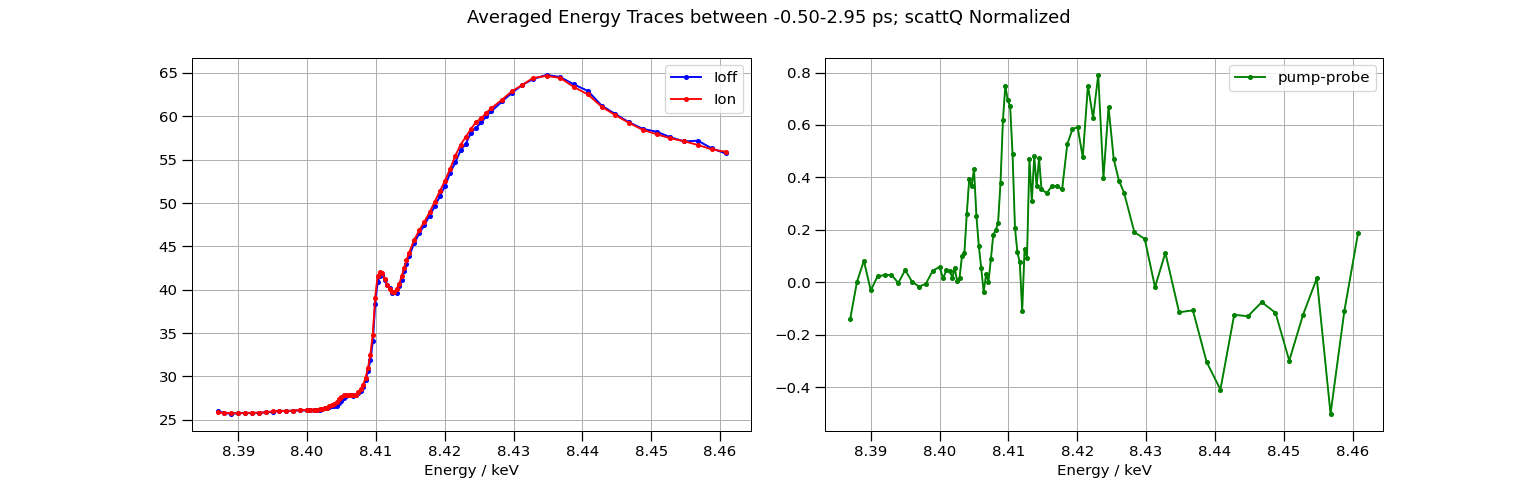

<IPython.core.display.Javascript object>


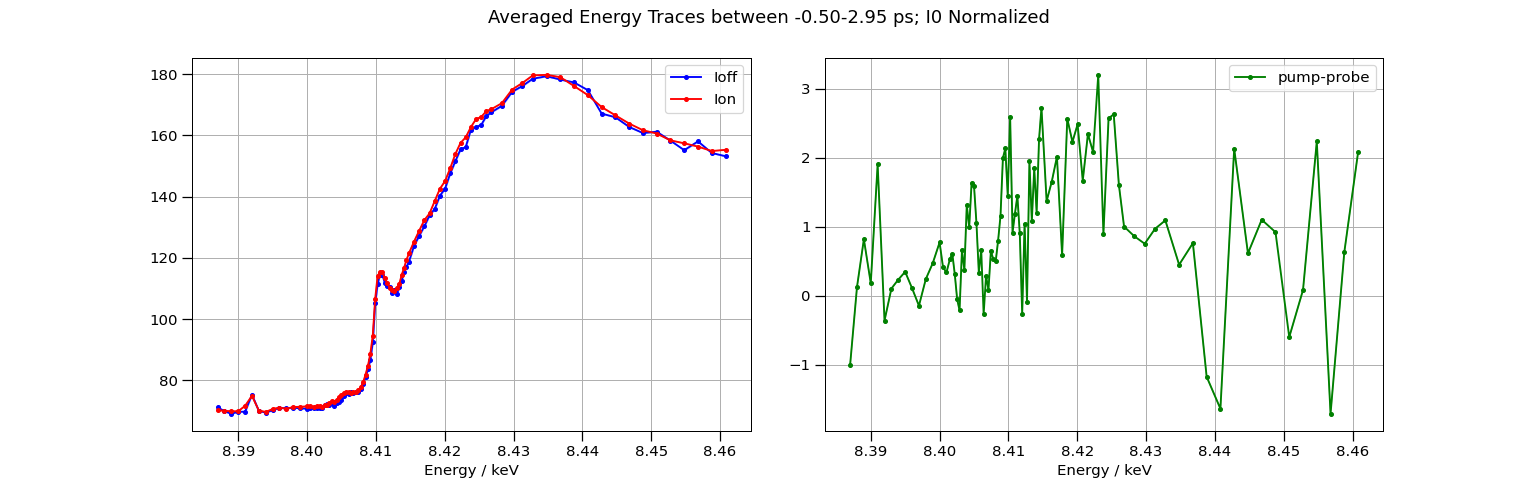

Text(0.5, 0, 'Energy / keV')

In [55]:
nrows = 6
ncols = 19

# ScattQ Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Energy Traces between {:.2f}-{:.2f} ps; scattQ Normalized'.format(delay[target_tbin_min],delay[target_tbin_max]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,intensity_loff_normQ_Eavg,'o-',color='blue',label='Ioff')
plt.fill_between(energy,(intensity_loff_normQ_Eavg-intensity_loff_normQ_Estd),
                 (intensity_loff_normQ_Eavg+intensity_loff_normQ_Estd),
                 color='blue', alpha=0.2)
plt.plot(energy,intensity_lon_normQ_Eavg,'o-',color='red',label='Ion')
plt.fill_between(energy,(intensity_lon_normQ_Eavg-intensity_lon_normQ_Estd),
                 (intensity_lon_normQ_Eavg+intensity_lon_normQ_Estd),
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,ppQ_Eavg,'o-',color='green',label='pump-probe')
plt.fill_between(energy,(ppQ_Eavg-ppQ_Estd),
                 (ppQ_Eavg+ppQ_Estd),
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')


# I0 Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Energy Traces between {:.2f}-{:.2f} ps; I0 Normalized'.format(delay[target_tbin_min],delay[target_tbin_max]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,intensity_loff_normI0_Eavg,'o-',color='blue',label='Ioff')
plt.fill_between(energy,(intensity_loff_normI0_Eavg-intensity_loff_normQ_Estd),
                 (intensity_loff_normI0_Eavg+intensity_loff_normI0_Estd),
                 color='blue', alpha=0.2)
plt.plot(energy,intensity_lon_normI0_Eavg,'o-',color='red',label='Ion')
plt.fill_between(energy,(intensity_lon_normI0_Eavg-intensity_lon_normI0_Estd),
                 (intensity_lon_normI0_Eavg+intensity_lon_normI0_Estd),
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(energy,ppI0_Eavg,'o-',color='green',label='pump-probe')
plt.fill_between(energy,(ppI0_Eavg-ppI0_Estd),
                 (ppI0_Eavg+ppI0_Estd),
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

### Save Integrated Energy Scan

In [56]:
norm_method = 'Q'     # 'Q' or 'I0'
    
    
# Set filenames for averaged data
if norm_method == 'Q':
    Eavg_name =  'EscanQ_{}_{}ps_'.format(target_delay_time_min, target_delay_time_max) + figname_scan_numbers
    Eavg_header = 'Averaged energy scan using runs = {}'.format(runs[:])+'\n'+'\nFor scattQ normalization'+'\n'+'\nTime delay = {} - {} ps'.format(target_delay_time_min, target_delay_time_max)+'\n''\nEnergy (keV), Laser_off_avg,  Laser_on_avg, Pump-probe_avg,Laser_off_std, Laser_on_std, Pump-probe_std'
    Eavg = np.array((energy,intensity_loff_normQ_Eavg,intensity_lon_normQ_Eavg, ppQ_Eavg,
                         intensity_loff_normQ_Estd,intensity_lon_normQ_Estd, ppQ_Estd)).T


if norm_method == 'I0':
    Eavg_name =  'EscanI0_{}_{}ps_'.format(target_delay_time_min, target_delay_time_max) + figname_scan_numbers
    Eavg_header = 'Averaged energy scan using runs = {}'.format(runs[:])+'\n'+'\nFor I0 normalization'+'\n'+'\nTime delay = {} -{} ps'.format(target_delay_time_min, target_delay_time_max)+'\n''\nEnergy (keV), Laser_off_avg,  Laser_on_avg, Pump-probe_avg, Laser_off_std, Laser_on_std, Pump-probe_std'
    Eavg = np.array((energy,intensity_loff_normI0_Eavg,intensity_lon_normI0_Eavg, ppI0_Eavg,
                         intensity_loff_normI0_Estd,intensity_lon_normI0_Estd, ppI0_Estd)).T


# Save data in txt file (csv format)
Eavg_name= Eavg_name.replace('.', 'p')
Eavg_fname = avg_output_path+'/'+Eavg_name +'.csv'
np.savetxt(Eavg_fname,Eavg,delimiter=',',header=Eavg_header,comments='')

print(Eavg_name)
print('------------------------')
print('Averaged data are saved!')
print('------------------------')

EscanQ_-0p5_3ps_Runs_242
------------------------
Averaged data are saved!
------------------------


## Plot 1D Time Scans (Integrated over Multiple Bins)

In [99]:
target_energy_min = 8.3
target_energy_max = 8.5

target_ebin_min = (np.argmin(np.abs(energy-target_energy_min)))
target_ebin_max = (np.argmin(np.abs(energy-target_energy_max)))
print('''
----------------------
Target Energy (Min) = {} keV
Target Energy (Max) = {} keV
----------------------
Actual Energy (Min) = {:.4f} keV
Actual Energy (Max) = {:.4f} keV
----------------------
'''.format(target_energy_min,target_energy_max,energy[target_ebin_min],energy[target_ebin_max]))


----------------------
Target Energy (Min) = 8.3 keV
Target Energy (Max) = 8.5 keV
----------------------
Actual Energy (Min) = 8.3000 keV
Actual Energy (Max) = 8.5000 keV
----------------------



### Visualise Target Energy Regions on 2D Plots

In [ ]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
plt.axhline(y=energy[target_ebin_min],color='red')
plt.axhline(y=energy[target_ebin_max],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
plt.axhline(y=energy[target_ebin_min],color='red')
plt.axhline(y=energy[target_ebin_max],color='red')
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Integrate Data over Specified Energy Region

In [100]:
intensity_loff_normQ_Tavg = np.nanmean(intensity_loff_normQ_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
intensity_lon_normQ_Tavg = np.nanmean(intensity_lon_normQ_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
ppQ_Tavg = np.nanmean(ppQ_avg[:,target_ebin_min:target_ebin_max+1],axis=1)

intensity_loff_normQ_Tstd = np.sqrt(np.sum(intensity_loff_normQ_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
intensity_lon_normQ_Tstd = np.sqrt(np.sum(intensity_lon_normQ_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
ppQ_Tstd = np.sqrt(np.sum(ppQ_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))

intensity_loff_normI0_Tavg = np.nanmean(intensity_loff_normI0_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
intensity_lon_normI0_Tavg = np.nanmean(intensity_lon_normI0_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
ppI0_Tavg = np.nanmean(ppI0_avg[:,target_ebin_min:target_ebin_max+1],axis=1)

intensity_loff_normI0_Tstd = np.sqrt(np.sum(intensity_loff_normI0_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
intensity_lon_normI0_Tstd = np.sqrt(np.sum(intensity_lon_normI0_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
ppI0_Tstd = np.sqrt(np.sum(ppI0_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))

<IPython.core.display.Javascript object>


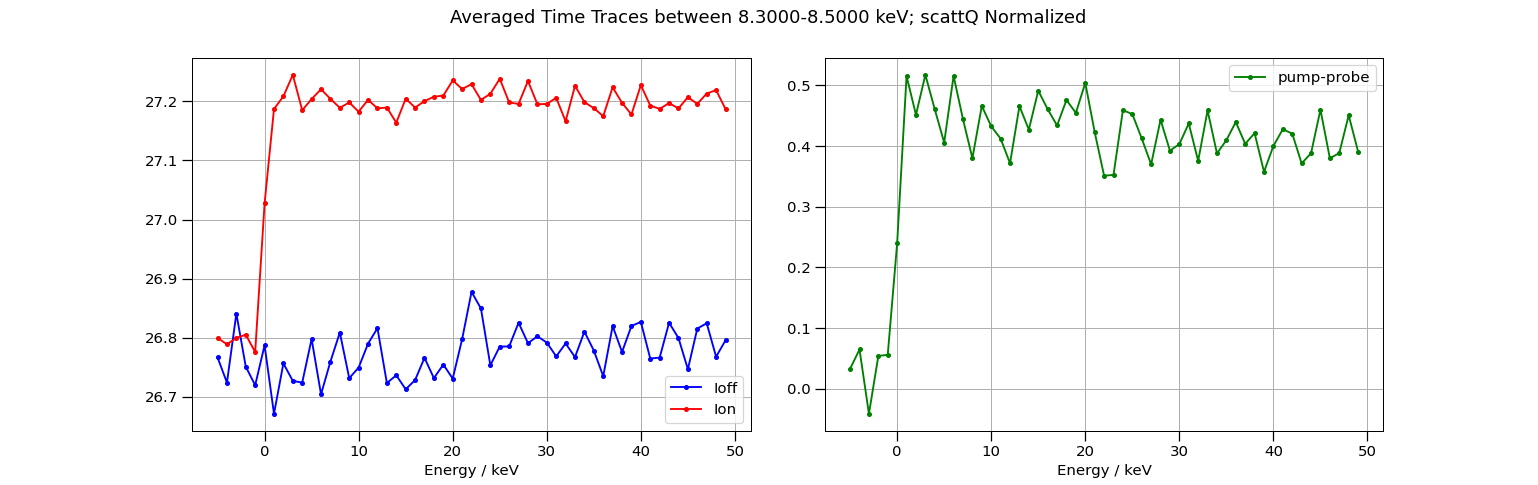

<IPython.core.display.Javascript object>


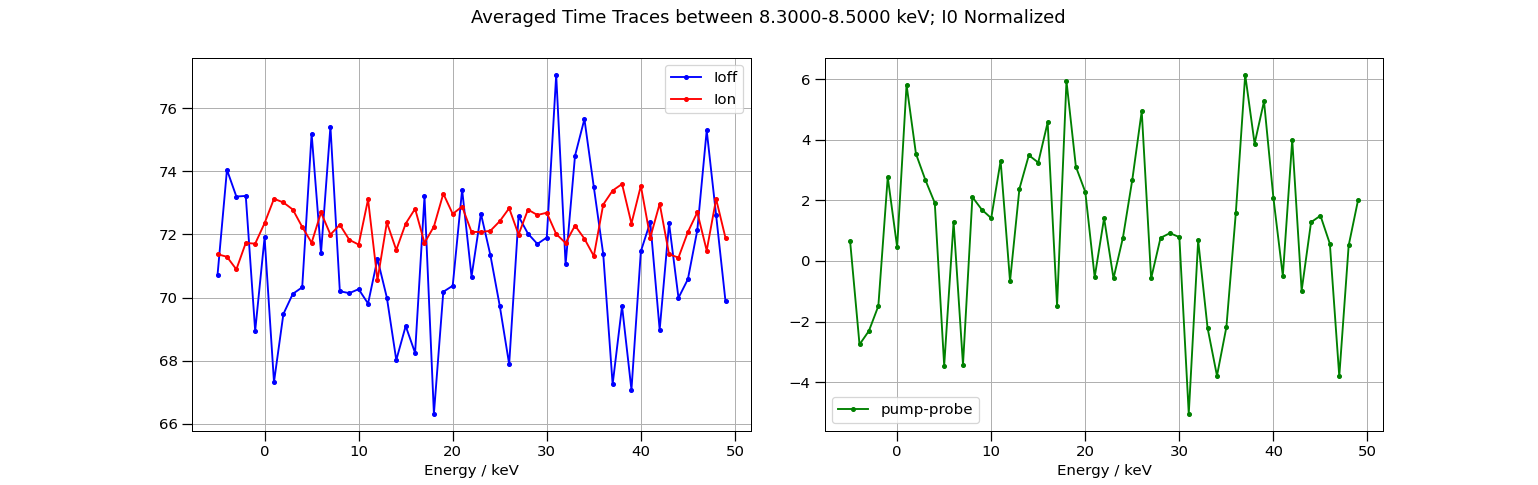

Text(0.5, 0, 'Energy / keV')

In [101]:
nrows = 6
ncols = 19

# ScattQ Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Time Traces between {:.4f}-{:.4f} keV; scattQ Normalized'.format(energy[target_ebin_min],energy[target_ebin_max]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,intensity_loff_normQ_Tavg,'o-',color='blue',label='Ioff')
plt.fill_between(delay,(intensity_loff_normQ_Tavg-intensity_loff_normQ_Tstd),
                 (intensity_loff_normQ_Tavg+intensity_loff_normQ_Tstd),
                 color='blue', alpha=0.2)
plt.plot(delay,intensity_lon_normQ_Tavg,'o-',color='red',label='Ion')
plt.fill_between(delay,(intensity_lon_normQ_Tavg-intensity_lon_normQ_Tstd),
                 (intensity_lon_normQ_Tavg+intensity_lon_normQ_Tstd),
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,ppQ_Tavg,'o-',color='green',label='pump-probe')
plt.fill_between(delay,(ppQ_Tavg-ppQ_Tstd),
                 (ppQ_Tavg+ppQ_Tstd),
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')


# I0 Normalized Plots

plt.figure(figsize=(ncols,nrows))
plt.suptitle('Averaged Time Traces between {:.4f}-{:.4f} keV; I0 Normalized'.format(energy[target_ebin_min],energy[target_ebin_max]))

plt.subplot2grid((nrows,ncols),(0,0),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,intensity_loff_normI0_Tavg,'o-',color='blue',label='Ioff')
plt.fill_between(delay,(intensity_loff_normI0_Tavg-intensity_loff_normQ_Tstd),
                 (intensity_loff_normI0_Tavg+intensity_loff_normI0_Tstd),
                 color='blue', alpha=0.2)
plt.plot(delay,intensity_lon_normI0_Tavg,'o-',color='red',label='Ion')
plt.fill_between(delay,(intensity_lon_normI0_Tavg-intensity_lon_normI0_Tstd),
                 (intensity_lon_normI0_Tavg+intensity_lon_normI0_Tstd),
                 color='red', alpha=0.2)
plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

plt.subplot2grid((nrows,ncols),(0,int((ncols/2)+1)),rowspan=nrows,colspan=int(ncols/2))
plt.plot(delay,ppI0_Tavg,'o-',color='green',label='pump-probe')
plt.fill_between(delay,(ppI0_Tavg-ppI0_Tstd),
                 (ppI0_Tavg+ppI0_Tstd),
                 color='green', alpha=0.2)

plt.legend()
plt.grid()
plt.xlabel('Energy / keV')

### Save Integrated Time Scan

In [102]:
norm_method = 'Q'     # 'Q' or 'I0'
    
    
# Set filenames for averaged data
if norm_method == 'Q':
    Tavg_name =  'TscanQ_{}_{}keV_'.format(target_energy_min, target_energy_max) + figname_scan_numbers
    Tavg_header = 'Averaged time scan using runs = {}'.format(runs[:])+'\n'+'\nFor scattQ normalization'+'\n'+'\nEnergy = {}-{} keV'.format(target_energy_min, target_energy_max)+'\n''\nTime delay (ps),  Laser_off_avg,  Laser_on_avg, Pump-probe_avg,Laser_off_std, Laser_on_std, Pump-probe_std'
    Tavg = np.array((energy,intensity_loff_normQ_Eavg,intensity_lon_normQ_Eavg, ppQ_Eavg,
                         intensity_loff_normQ_Estd,intensity_lon_normQ_Estd, ppQ_Estd)).T


if norm_method == 'I0':
    Tavg_name =  'TscanI0_{}_{}keV_'.format(target_energy_min, target_energy_max) + figname_scan_numbers
    Tavg_header = 'Averaged time scan using runs = {}'.format(runs[:])+'\n'+'\nFor I0 normalization'+'\n'+'\nEnergy = {}-{} keV'.format(target_energy_min, target_energy_max)+'\n''\nTime delay (ps),  Laser_off_avg,  Laser_on_avg, Pump-probe_avg,Laser_off_std, Laser_on_std, Pump-probe_std'
    Tavg = np.array((energy,intensity_loff_normI0_Eavg,intensity_lon_normI0_Eavg, ppI0_Eavg,
                         intensity_loff_normI0_Estd,intensity_lon_normI0_Estd, ppI0_Estd)).T


# Save data in txt file (csv format)
Tavg_name= Tavg_name.replace('.', 'p')
Tavg_fname = avg_output_path+'/'+Tavg_name +'.csv'
np.savetxt(Tavg_fname,Tavg,delimiter=',',header=Tavg_header,comments='')


print('------------------------')
print('Averaged data are saved!')
print('------------------------')

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.28-py3/lib/python3.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

# Compare Integrated Bins

## Compare Energy Traces at Different Integrated Time Regions

In [5]:
#target_delay_time_regions = [(2,5),(5,10),(10,15),(15,20)]
target_delay_time_regions = [(0.2,0.3),(0.5,1),(2.0,2.95)]
# target_delay_time_regions = [(-0.5,-0.2),(0.1,0.3),(0.5,0.8),(1.5,3)]

target_tbins_min = []
target_tbins_max = []

for i,target_delay_time_region in enumerate(target_delay_time_regions):
    target_tbin_min = (np.argmin(np.abs(delay-target_delay_time_region[0])))
    target_tbin_max = (np.argmin(np.abs(delay-target_delay_time_region[-1])))
    
    target_tbins_min.append(target_tbin_min)
    target_tbins_max.append(target_tbin_max)
    
    print('''
    ----------------------
    Target Delay Time Region = {}-{} ps
    Actual Delay Time = {:.2f}-{:.2f} ps
    ----------------------
    '''.format(target_delay_time_region[0],target_delay_time_region[-1],delay[target_tbin_min],delay[target_tbin_max]))


    ----------------------
    Target Delay Time Region = 0.2-0.3 ps
    Actual Delay Time = 0.20-0.30 ps
    ----------------------
    

    ----------------------
    Target Delay Time Region = 0.5-1 ps
    Actual Delay Time = 0.50-1.00 ps
    ----------------------
    

    ----------------------
    Target Delay Time Region = 2.0-2.95 ps
    Actual Delay Time = 2.00-2.95 ps
    ----------------------
    


### Visualise Target Delay Time Regions on 2D Plots
Note, region spans from red line (left) to white line (right)

Text(0.5, 1.0, 'I0 Normalized')

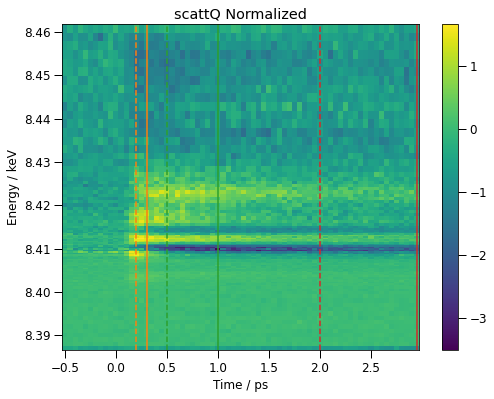

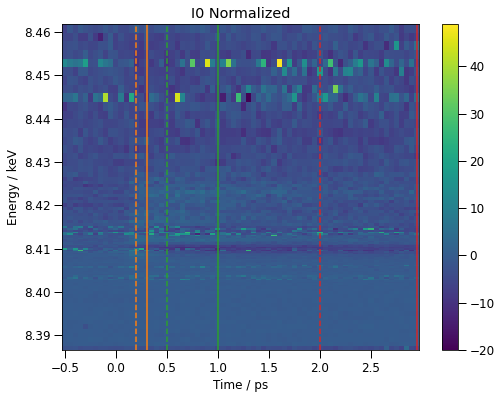

In [7]:
plt.figure(figsize=(8,6))
# next(ax._get_lines.prop_cycler)['color']
# colorcycles = ['
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
for c, target_tbin_min in enumerate(target_tbins_min):
    plt.axvline(x=delay[target_tbin_min], ls = '--', color = 'C%i'%(c+1))
for c, target_tbin_max in enumerate(target_tbins_max):
    plt.axvline(x=delay[target_tbin_max], color = 'C%i'%(c+1))
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
for c, target_tbin_min in enumerate(target_tbins_min):
    plt.axvline(x=delay[target_tbin_min], ls = '--', color = 'C%i'%(c+1))
for c, target_tbin_max in enumerate(target_tbins_max):
    plt.axvline(x=delay[target_tbin_max],color = 'C%i'%(c+1))
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Plot Stacked 1D Energy Traces Integrated over Specified Time Regions

No handles with labels found to put in legend.


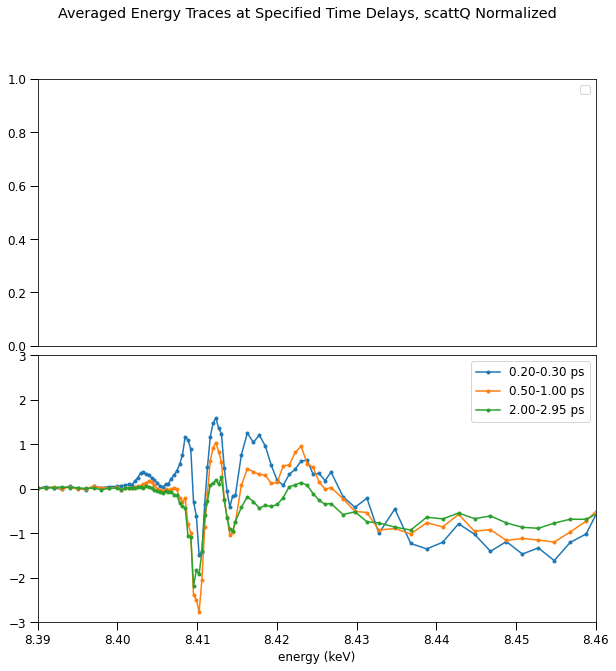

In [9]:
norm_method = 'Q'     # 'Q' or 'I0'
# e_min = 8.39
# e_max = 8.46
e_min = 8.39
e_max = 8.46

energy_scan_ppQ_output = np.zeros((len(target_delay_time_regions),len(ppQ_avg[0,:])))
energy_scan_ppQ_std_output = np.zeros_like(energy_scan_ppQ_output)

energy_scan_ppI0_output = np.zeros((len(target_delay_time_regions),len(ppI0_avg[0,:])))
energy_scan_ppI0_std_output = np.zeros_like(energy_scan_ppI0_output)

if norm_method == 'Q':
    nrows = 10
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Energy Traces at Specified Time Delays, scattQ Normalized')
    
    plt.subplot2grid((nrows,ncols),(0,0),rowspan=int(nrows/2),colspan=ncols)
#     plt.plot(energy,np.nanmean(intensity_loff_normQ_avg[:,:],axis=0),'-o',color='black',label='Ioff')
    plt.xticks([])
    plt.xlim(e_min,e_max)
    plt.legend()
    
    plt.subplot2grid((nrows,ncols),(int(nrows/2),0),rowspan=int(nrows/2),colspan=ncols)
    for i,target_tbin_min in enumerate(target_tbins_min):
        
        target_tbin_max = target_tbins_max[i]
        
#         intensity_loff_normQ_Eavg = np.nanmean(intensity_loff_normQ_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
#         intensity_lon_normQ_Eavg = np.nanmean(intensity_lon_normQ_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
        ppQ_Eavg = np.nanmean(ppQ_avg[target_tbin_min:target_tbin_max+1,:],axis=0)

#         intensity_loff_normQ_Estd = np.sqrt(np.sum(intensity_loff_normQ_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
#         intensity_lon_normQ_Estd = np.sqrt(np.sum(intensity_lon_normQ_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
        ppQ_Estd = np.sqrt(np.sum(ppQ_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
        
        energy_scan_ppQ_output[i,:] = ppQ_Eavg
        energy_scan_ppQ_std_output[i,:] = ppQ_Estd
        
        plt.plot(energy,ppQ_Eavg,'-o',label='{:.2f}-{:.2f} ps'.format(delay[target_tbin_min],delay[target_tbin_max]))
    plt.legend()
    plt.xlabel('energy (keV)')
    plt.xlim(e_min,e_max)
    plt.ylim(-3,3)

if norm_method == 'I0':
    nrows = 10
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Energy Traces at Specified Time Delays, I0 Normalized')
    
    plt.subplot2grid((nrows,ncols),(0,0),rowspan=int(nrows/2),colspan=ncols)
    plt.plot(energy,np.nanmean(intensity_loff_normI0_avg[:,:],axis=0),'-o',color='black',label='Ioff')
    plt.xlabel('energy (keV)')
    plt.xticks([])
    plt.xlim(e_min,e_max)
    plt.ylim(-3,3)
    plt.legend()
    
    plt.subplot2grid((nrows,ncols),(int(nrows/2),0),rowspan=int(nrows/2),colspan=ncols)
    for i,target_tbin_min in enumerate(target_tbins_min):
        
        target_tbin_max = target_tbins_max[i]
        
        intensity_loff_normI0_Eavg = np.nanmean(intensity_loff_normI0_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
        intensity_lon_normI0_Eavg = np.nanmean(intensity_lon_normI0_avg[target_tbin_min:target_tbin_max+1,:],axis=0)
        ppI0_Eavg = np.nanmean(ppI0_avg[target_tbin_min:target_tbin_max+1,:],axis=0)

        intensity_loff_normI0_Estd = np.sqrt(np.sum(intensity_loff_normI0_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
        intensity_lon_normI0_Estd = np.sqrt(np.sum(intensity_lon_normI0_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
        ppI0_Estd = np.sqrt(np.sum(ppI0_std[target_tbin_min:target_tbin_max+1,:]**2,axis=0))
        
        energy_scan_ppI0_output[i,:] = ppI0_Eavg
        energy_scan_ppI0_std_output[i,:] = ppI0_Estd
        
        plt.plot(energy,ppI0_Eavg,'-o',label='{:.2f}-{:.2f} ps'.format(delay[target_tbin_min],delay[target_tbin_max]))
    plt.legend()
    plt.xlabel('energy (keV)')
    plt.xlim(e_min,e_max)
    plt.ylim(-3,3)

## Compare Time Traces at Different Integrated Energy Regions

In [17]:
#target_energy_regions = [(8.4025,8.4045),(8.408,8.409),(8.4095,8.410),(8.4105,8.4115),(8.4115,8.413),(8.416,8.419)]
#target_energy_regions = [(8.409,8.411),(8.415,8.425)]
target_energy_regions = [(8.404,8.4055),(8.409,8.410),(8.417,8.420),(8.420,8.425)]

target_ebins_min = []
target_ebins_max = []

for i,target_energy_region in enumerate(target_energy_regions):
    target_ebin_min = (np.argmin(np.abs(energy-target_energy_region[0])))
    target_ebin_max = (np.argmin(np.abs(energy-target_energy_region[-1])))
    
    target_ebins_min.append(target_ebin_min)
    target_ebins_max.append(target_ebin_max)
    
    print('''
    ----------------------
    Target Delay Time Region = {}-{} keV
    Actual Delay Time = {:.4f}-{:.4f} keV
    ----------------------
    '''.format(target_energy_region[0],target_energy_region[-1],energy[target_ebin_min],energy[target_ebin_max]))


    ----------------------
    Target Delay Time Region = 8.404-8.4055 keV
    Actual Delay Time = 8.4040-8.4054 keV
    ----------------------
    

    ----------------------
    Target Delay Time Region = 8.409-8.41 keV
    Actual Delay Time = 8.4088-8.4099 keV
    ----------------------
    

    ----------------------
    Target Delay Time Region = 8.417-8.42 keV
    Actual Delay Time = 8.4170-8.4200 keV
    ----------------------
    

    ----------------------
    Target Delay Time Region = 8.42-8.425 keV
    Actual Delay Time = 8.4200-8.4253 keV
    ----------------------
    


### Visualise Target Energy Regions on 2D Plots
Note, region spans from red line (lower) to white line (upper)

Text(0.5, 1.0, 'I0 Normalized')

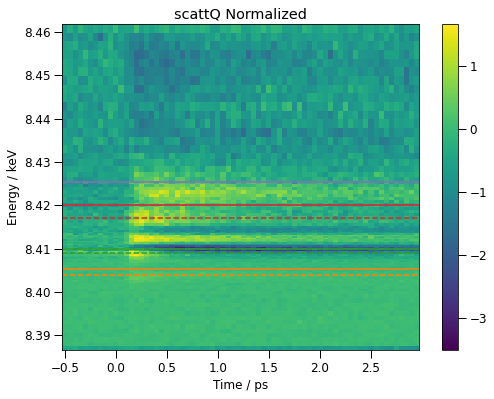

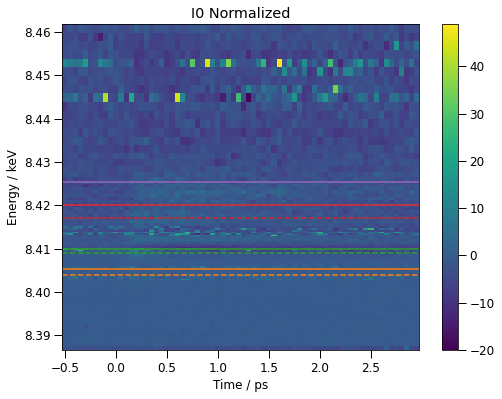

In [18]:
plt.figure(figsize=(8,6))
plt.pcolormesh(delay,energy,ppQ_avg.T,shading='auto')
for c, target_ebin_min in enumerate(target_ebins_min):
    plt.axhline(y=energy[target_ebin_min],ls = '--', color='C%i'%(c+1))
for c, target_ebin_max in enumerate(target_ebins_max):
    plt.axhline(y=energy[target_ebin_max],color='C%i'%(c+1))
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('scattQ Normalized')

plt.figure(figsize=(8,6))

plt.pcolormesh(delay,energy,ppI0_avg.T,shading='auto')
for c, target_ebin_min in enumerate(target_ebins_min):
    plt.axhline(y=energy[target_ebin_min],ls = '--', color='C%i'%(c+1))
for c, target_ebin_max in enumerate(target_ebins_max):
    plt.axhline(y=energy[target_ebin_max],color='C%i'%(c+1))
plt.colorbar()
plt.xlabel('Time / ps')
plt.ylabel('Energy / keV')
plt.title('I0 Normalized')

### Plot Stacked 1D Time Traces Integrated over Specified Energy Regions

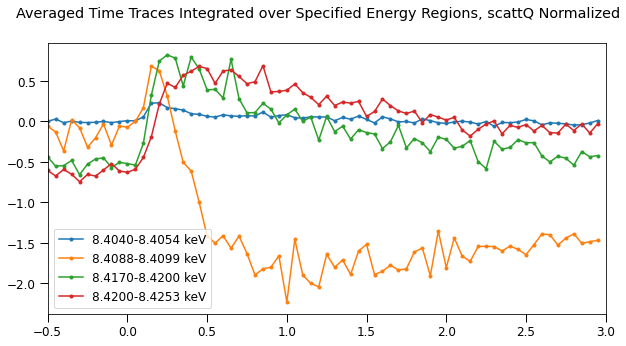

In [19]:
norm_method = 'Q'     # 'Q' or 'I0'
t_min = -0.5
t_max = 3

time_scan_ppQ_output = np.zeros((len(target_energy_regions),len(ppQ_avg[:,0])))
time_scan_ppQ_std_output = np.zeros_like(time_scan_ppQ_output)

time_scan_ppI0_output = np.zeros((len(target_energy_regions),len(ppI0_avg[:,0])))
time_scan_ppI0_std_output = np.zeros_like(time_scan_ppI0_output)

if norm_method == 'Q':
    nrows = 5
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Time Traces Integrated over Specified Energy Regions, scattQ Normalized')
    
    for i,target_ebin_min in enumerate(target_ebins_min):
        
        target_ebin_max = target_ebins_max[i]
        
#         intensity_loff_normQ_Tavg = np.nanmean(intensity_loff_normQ_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
#         intensity_lon_normQ_Tavg = np.nanmean(intensity_lon_normQ_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
        ppQ_Tavg = np.nanmean(ppQ_avg[:,target_ebin_min:target_ebin_max+1],axis=1)

#         intensity_loff_normQ_Tstd = np.sqrt(np.sum(intensity_loff_normQ_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
#         intensity_lon_normQ_Tstd = np.sqrt(np.sum(intensity_lon_normQ_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
        ppQ_Tstd = np.sqrt(np.sum(ppQ_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
        
        time_scan_ppQ_output[i,:] = ppQ_Tavg
        time_scan_ppQ_std_output[i,:] = ppQ_Tstd
        
        plt.plot(delay,ppQ_Tavg,'-o',label='{:.4f}-{:.4f} keV'.format(energy[target_ebin_min],energy[target_ebin_max]))
#         plt.fill_between(delay,ppQ_Tavg-ppQ_Tstd,ppQ_Tavg+ppQ_Tstd,alpha=0.2)
    plt.legend()
    plt.xlim(t_min,t_max)

if norm_method == 'I0':
    nrows = 5
    ncols = 10

    plt.figure(figsize=(ncols,nrows))
    
    plt.suptitle('Averaged Time Traces Integrated over Specified Energy Regions, I0 Normalized')
    
    for i,target_ebin_min in enumerate(target_ebins_min):
        
        target_ebin_max = target_ebins_max[i]
        

        intensity_loff_normI0_Tavg = np.nanmean(intensity_loff_normI0_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
        intensity_lon_normI0_Tavg = np.nanmean(intensity_lon_normI0_avg[:,target_ebin_min:target_ebin_max+1],axis=1)
        ppI0_Tavg = np.nanmean(ppI0_avg[:,target_ebin_min:target_ebin_max+1],axis=1)

        intensity_loff_normI0_Tstd = np.sqrt(np.sum(intensity_loff_normI0_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
        intensity_lon_normI0_Tstd = np.sqrt(np.sum(intensity_lon_normI0_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
        ppI0_Tstd = np.sqrt(np.sum(ppI0_std[:,target_ebin_min:target_ebin_max+1]**2,axis=1))
        
        time_scan_ppI0_output[i,:] = ppI0_Tavg
        time_scan_ppI0_std_output[i,:] = ppI0_Tstd
        
        plt.plot(delay,ppI0_Tavg,'-o',label='{:.2f}-{:.2f} ps'.format(energy[target_ebin_min],energy[target_ebin_max]))
        plt.fill_between(delay,ppI0_Tavg-ppI0_Tstd,ppI0_Tavg+ppI0_Tstd,alpha=0.2)
    plt.legend()
    plt.xlabel('delay time')
    plt.xlim(t_min,t_max)

# Save Integrated Energy Scans

In [13]:
def write_runs_string(runs):
    run_string = ''
    for i,run in enumerate(runs):
        try:
            if i == 0:
                run_string += (str(run))
            elif (runs[i+1] == run + 1)&(runs[i-1] == run - 1):
                pass
            elif (runs[i+1] != run + 1)&(runs[i-1] == run - 1):
                run_string += ('-')
                run_string += (str(run))
                run_string += ('_')
            elif (runs[i+1] != run + 1)&(runs[i-1] != run - 1):
                run_string += (str(run))
                run_string += ('_')
            elif (runs[i+1] == run + 1)&(runs[i-1] != run - 1):
                run_string += (str(run))
        except IndexError:
            if (runs[i-1] == run - 1):
                run_string += ('-')
                run_string += (str(run))
            else:
                run_string += (str(run))
    return run_string

sample = 'Stack_195_to_203'

# avg_output_path = '/cds/data/psdm/xpp/xpplw6419/scratch/SLR/avgs/{}'.format(sample) # path to save averaged data
# exp = 'xpplw6419'

# if not os.path.isdir(avg_output_path):
#     os.makedirs(avg_output_path)
    
run_string = write_runs_string(runs)

energy_scan_name = '{}_integrated_energy_scans_normQ_{}-scan_avg_runs_{}.csv'.format(exp,len(runs),run_string) 
energy_scan_fname = avg_output_path+'/'+energy_scan_name

energy_scan_header = '''Energy Scans Integrated Over Define Time Regions

Data averaged usings runs {}

Data normalized using integrated scattering signal

Energy (keV)'''.format(runs[:])

for i in range(len(target_delay_time_regions)):
    energy_scan_header += ',{:.2f}-{:.2f} ps (data)'.format(delay[target_tbins_min[i]],delay[target_tbins_max[i]])
    energy_scan_header += ',{:.2f}-{:.2f} ps (std)'.format(delay[target_tbins_min[i]],delay[target_tbins_max[i]])

energy_scan_header += '\n'

energy_scan_output = np.zeros(((energy_scan_ppQ_output.shape[0]*2)+1,energy_scan_ppQ_output.shape[1]))
energy_scan_output[0,:] = energy
for i in range(energy_scan_ppQ_output.shape[0]):
    energy_scan_output[(2*i)+1,:] = energy_scan_ppQ_output[i,:]
    energy_scan_output[(2*i)+2,:] = energy_scan_ppQ_std_output[i,:]
    
np.savetxt(energy_scan_fname,energy_scan_output.T,delimiter=',',header=energy_scan_header,comments='')

# Save Integrated Time Scans

In [14]:
def write_runs_string(runs):
    run_string = ''
    for i,run in enumerate(runs):
        try:
            if i == 0:
                run_string += (str(run))
            elif (runs[i+1] == run + 1)&(runs[i-1] == run - 1):
                pass
            elif (runs[i+1] != run + 1)&(runs[i-1] == run - 1):
                run_string += ('-')
                run_string += (str(run))
                run_string += ('_')
            elif (runs[i+1] != run + 1)&(runs[i-1] != run - 1):
                run_string += (str(run))
                run_string += ('_')
            elif (runs[i+1] == run + 1)&(runs[i-1] != run - 1):
                run_string += (str(run))
        except IndexError:
            if (runs[i-1] == run - 1):
                run_string += ('-')
                run_string += (str(run))
            else:
                run_string += (str(run))
    return run_string

# sample = 'NiMPO_266nm_Escan3_-0.5-3ps'

# avg_output_path = '/cds/data/psdm/xpp/xpplw6419/scratch/SLR/avgs/{}'.format(sample) # path to save averaged data
# exp = 'xpplw6419'

# if not os.path.isdir(avg_output_path):
#     os.makedirs(avg_output_path)
    
run_string = write_runs_string(runs)

time_scan_name = '{}_integrated_time_scans_normQ_{}-scan_avg_runs_{}.csv'.format(exp,len(runs),run_string) 
time_scan_fname = avg_output_path+'/'+time_scan_name

time_scan_header = '''Time Scans Integrated Over Defined Energy Regions

Data averaged usings runs {}

Data normalized using integrated scattering signal

Time (ps)'''.format(runs[:])

for i in range(len(target_energy_regions)):
    time_scan_header += ',{:.4f}-{:.4f} keV (data)'.format(energy[target_ebins_min[i]],energy[target_ebins_max[i]])
    time_scan_header += ',{:.4f}-{:.4f} keV (std)'.format(energy[target_ebins_min[i]],energy[target_ebins_max[i]])

time_scan_header += '\n'

time_scan_output = np.zeros(((time_scan_ppQ_output.shape[0]*2)+1,time_scan_ppQ_output.shape[1]))
time_scan_output[0,:] = delay
for i in range(time_scan_ppQ_output.shape[0]):
    time_scan_output[(2*i)+1,:] = time_scan_ppQ_output[i,:]
    time_scan_output[(2*i)+2,:] = time_scan_ppQ_std_output[i,:]
    
np.savetxt(time_scan_fname,time_scan_output.T,delimiter=',',header=time_scan_header,comments='')